In [2]:
import pandas as pd 

orders = pd.read_csv('orders_seed_0.csv')
attendees = pd.read_csv('attendees_seed_0.csv')

In [3]:
orders.head()

,order_id,attendee_id,menu_item_name,price,contains_alcohol,status
0,1,A4,Water,3.0,0,completed
1,2,A6,Fries,3.2,0,completed
2,3,A54,Wings,3.6,0,completed
3,4,A69,Wrap,5.0,0,completed
4,5,A11,Tacos,4.0,0,completed


In [4]:
attendees.head()

,id,age,ticket_type,total_drinks,total_foods,total_treatments,total_bathroom_visits,total_stage_visits,gender,entered_at,exited_at
0,A1,30,No ticket,0,0,0,0,0,Male,NaN,NaN
1,A10,30,VIP,7,5,0,2,2,Female,15:03:23,15:06:37
2,A100,19,1-day pass,8,4,0,1,7,Male,15:03:26,15:07:03
3,A101,32,1-day pass,0,2,0,0,1,Male,15:03:26,15:04:12
4,A102,38,No ticket,0,0,0,0,0,Female,NaN,NaN


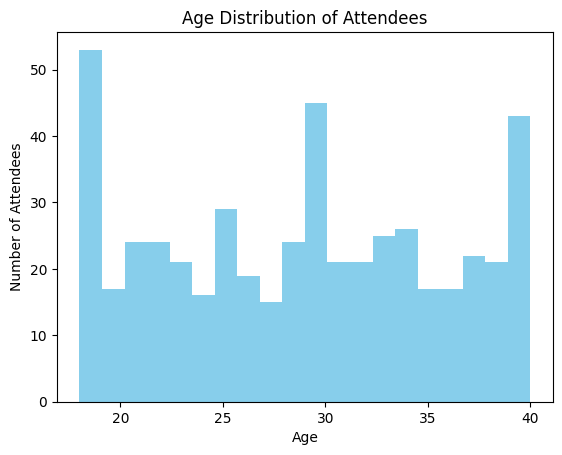

In [5]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
attendees['age'].hist(bins=20, color='skyblue')
plt.title('Age Distribution of Attendees')
plt.xlabel('Age')
plt.ylabel('Number of Attendees')
plt.grid(False)
plt.show()

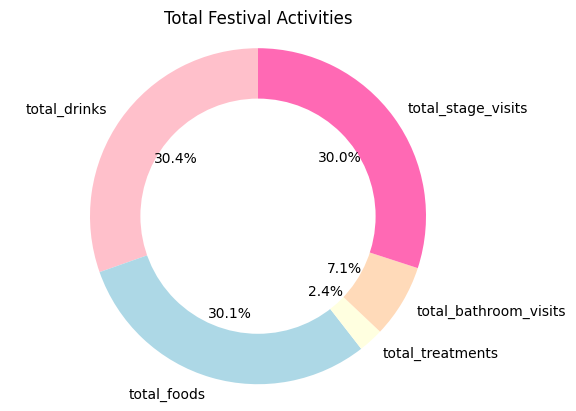

In [10]:

activity_sums = attendees[['total_drinks', 'total_foods', 'total_treatments', 'total_bathroom_visits', 'total_stage_visits']].sum()

fig, ax = plt.subplots()
ax.pie(activity_sums, labels=activity_sums.index, autopct='%1.1f%%', startangle=90, colors=['#FFC0CB', '#ADD8E6', '#FFFFE0', '#FFDAB9', '#FF69B4'])
ax.axis('equal')  

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Total Festival Activities')
plt.show()

In [27]:
attendees['age'].mean()

28.802

In [28]:
attendees['ticket_type'].value_counts()

ticket_type
1-day pass    127
3-day pass    127
No ticket     125
VIP           121
Name: count, dtype: int64

In [29]:
attendees['gender'].value_counts()

gender
Male      250
Female    250
Name: count, dtype: int64

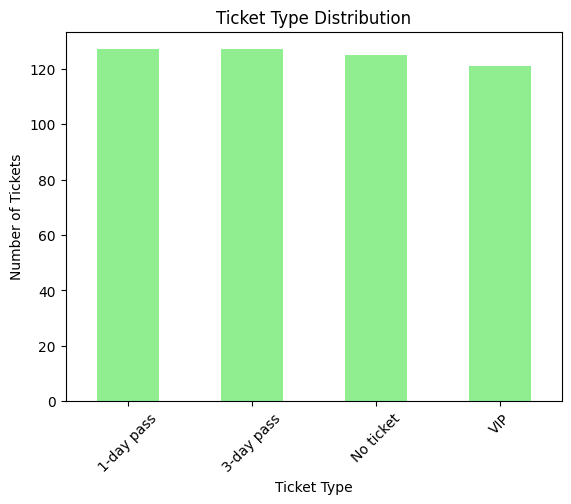

In [5]:
ticket_counts = attendees['ticket_type'].value_counts()
ticket_counts.plot(kind='bar', color='lightgreen')
plt.title('Ticket Type Distribution')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

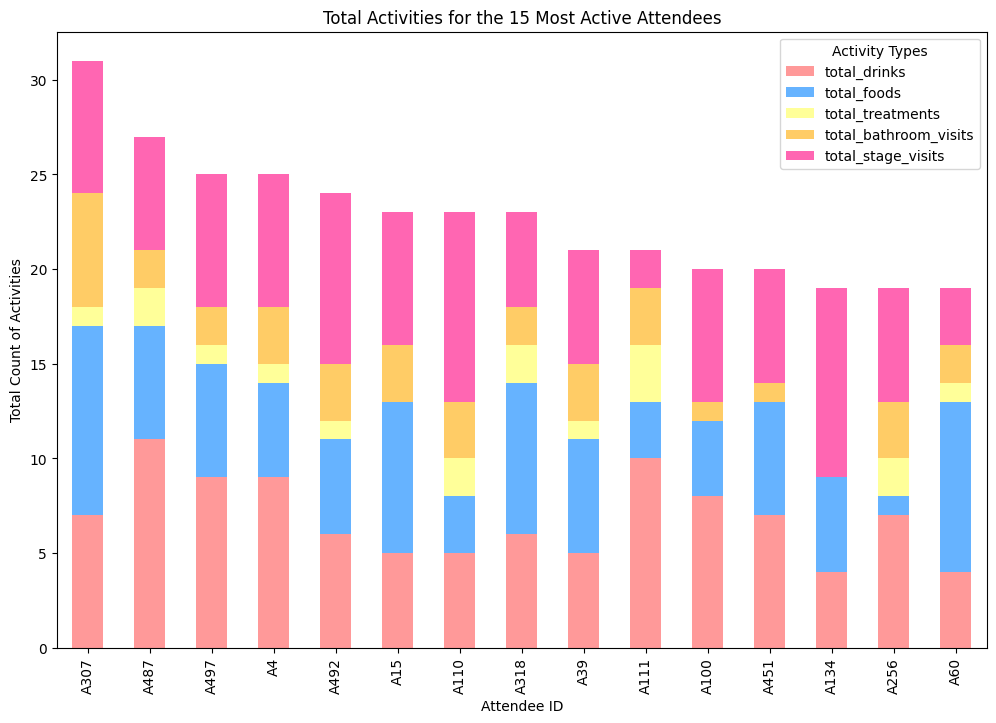

In [11]:

attendees['total_activity'] = attendees[['total_drinks', 'total_foods', 'total_treatments', 'total_bathroom_visits', 'total_stage_visits']].sum(axis=1)

# Filter out attendees with 'No ticket'
df = attendees[attendees['ticket_type'] != 'No ticket']

df_top15 = df.sort_values(by='total_activity', ascending=False).head(15)

colors = ['#ff9999', '#66b3ff', '#ffff99', '#ffcc66', '#ff66b2']

totals_df = df_top15[['total_drinks', 'total_foods', 'total_treatments', 'total_bathroom_visits', 'total_stage_visits']]
totals_df.set_index(df_top15['id'], inplace=True)

totals_df.plot(kind='bar', stacked=True,color=colors, figsize=(12, 8))
plt.title('Total Activities for the 15 Most Active Attendees')
plt.xlabel('Attendee ID')
plt.ylabel('Total Count of Activities')
plt.legend(title='Activity Types')
plt.show()

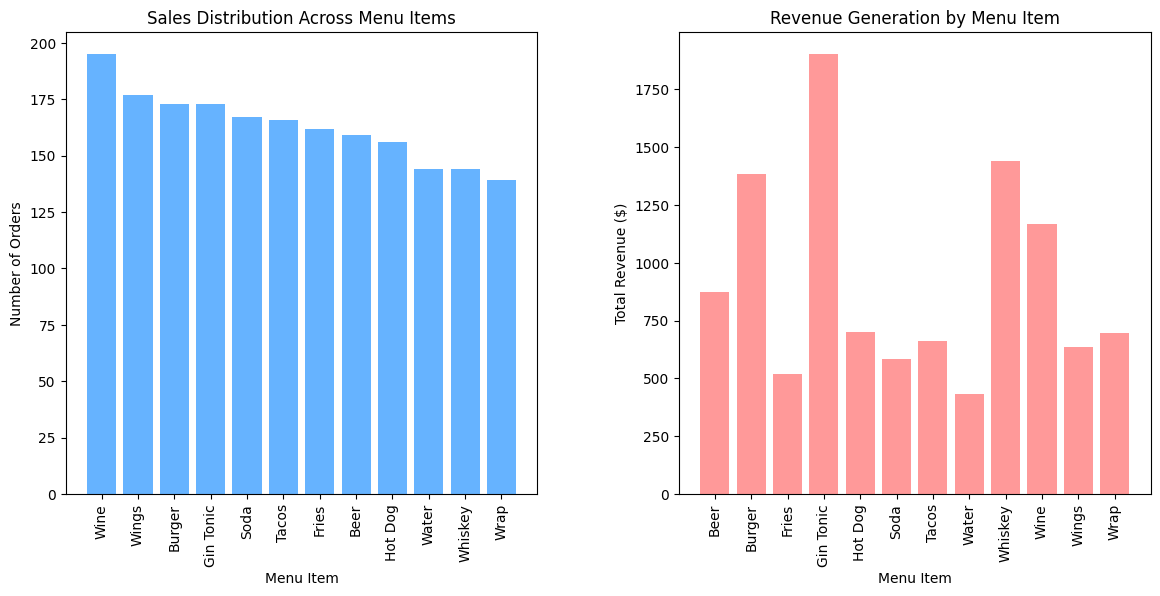

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Sales Distribution Across Menu Items
menu_item_counts = orders['menu_item_name'].value_counts()
axes[0].bar(menu_item_counts.index, menu_item_counts.values, color='#66b3ff')
axes[0].set_title('Sales Distribution Across Menu Items')
axes[0].set_xlabel('Menu Item')
axes[0].set_ylabel('Number of Orders')
axes[0].tick_params(axis='x', rotation=90)

# Revenue Generation by Menu Item
revenue_per_item = orders.groupby('menu_item_name')['price'].sum()
axes[1].bar(revenue_per_item.index, revenue_per_item.values, color='#ff9999')
axes[1].set_title('Revenue Generation by Menu Item')
axes[1].set_xlabel('Menu Item')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].tick_params(axis='x', rotation=90)

plt.show()

In [30]:
orders['price'].sum()

11004.6